In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

#import image_data_generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# data generator
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256, 256), # resize the image because images are of different sizes
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
#normalize the images to [0,1]
def normalize_images(image, label):
    return image/255, label

train_dataset = train_dataset.map(normalize_images)
test_dataset = test_dataset.map(normalize_images)

In [4]:
# create the CNN architecture
# first we will try with tanh as activation then we will try with relu

model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# fit the model
history = model.fit(train_dataset, epochs=15, verbose=1, validation_data=test_dataset)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 124ms/step - accuracy: 0.5972 - loss: 0.6649 - val_accuracy: 0.6986 - val_loss: 0.5698
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 103ms/step - accuracy: 0.7150 - loss: 0.5536 - val_accuracy: 0.7416 - val_loss: 0.5219
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.7602 - loss: 0.4963 - val_accuracy: 0.7596 - val_loss: 0.4958
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.7909 - loss: 0.4466 - val_accuracy: 0.7662 - val_loss: 0.4837
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.8208 - loss: 0.4019 - val_accuracy: 0.7692 - val_loss: 0.4805
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.8481 - loss: 0.3580 - val_accuracy: 0.7730 - val_loss: 0.4827
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.8666 - loss: 0.3214 - val_accuracy: 0.7768 - val_loss: 0.5010
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.8885 - loss: 0

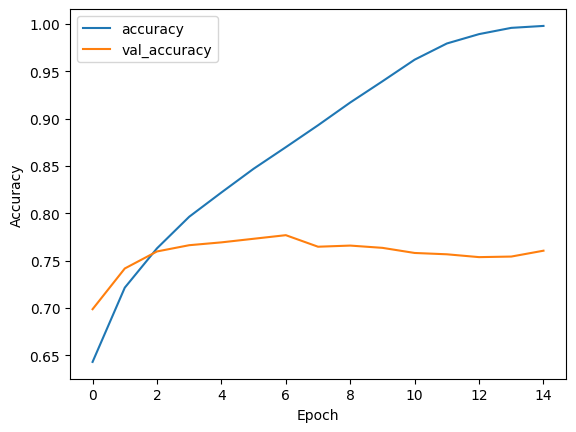

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='tanh', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='tanh'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# we see from the above plot that overfitting is happening. So we will try with early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_dataset, epochs=15, verbose=1, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 121ms/step - accuracy: 0.5984 - loss: 0.6851 - val_accuracy: 0.7314 - val_loss: 0.5454
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.7134 - loss: 0.5479 - val_accuracy: 0.7530 - val_loss: 0.5096
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.7709 - loss: 0.4810 - val_accuracy: 0.7700 - val_loss: 0.4750
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.8053 - loss: 0.4323 - val_accuracy: 0.7692 - val_loss: 0.4736
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 119ms/step - accuracy: 0.8248 - loss: 0.3934 - val_accuracy: 0.7730 - val_loss: 0.4747
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.8509 - loss: 0.3554 - val_accuracy: 0.7756 - val_loss: 0.4723
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.8697 - loss: 0.3162 - val_accuracy: 0.7758 - val_loss: 0.4890
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 118ms/step - accuracy: 0.8991 - loss: 0

### Now we try with relu activation

In [11]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', padding = 'valid', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_dataset, epochs=15, verbose=1, validation_data=test_dataset, callbacks=[early_stopping])

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 117ms/step - accuracy: 0.5867 - loss: 0.6580 - val_accuracy: 0.7102 - val_loss: 0.5655
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step - accuracy: 0.7121 - loss: 0.5551 - val_accuracy: 0.7544 - val_loss: 0.5033
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.7654 - loss: 0.4873 - val_accuracy: 0.7754 - val_loss: 0.4727
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 118ms/step - accuracy: 0.7904 - loss: 0.4504 - val_accuracy: 0.7850 - val_loss: 0.4543
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.8049 - loss: 0.4248 - val_accuracy: 0.8096 - val_loss: 0.4246
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 118ms/step - accuracy: 0.8261 - loss: 0.3917 - val_accuracy: 0.8144 - val_loss: 0.4164
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.8422 - loss: 0.3616 - val_accuracy: 0.8092 - val_loss: 0.4159
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 103ms/step - accuracy: 0.8500 - loss: 0

### To address the problem of overfitting we perform data augmentation.
### We use Image_Data_Generator

In [14]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For testing images, only normalize pixel values (no augmentation needed)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator that reads images from the training directory
train_generator = train_datagen.flow_from_directory(
    directory = '/content/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Create testing data generator that reads images from the testing directory
test_generator = test_datagen.flow_from_directory(
    directory ='/content/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', padding = 'valid', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(32, (5,5),padding='valid' ,activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Conv2D(64, (5,5), padding ='valid', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# two dense hidden layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_generator, epochs=100, verbose=1, validation_data = test_generator,callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 207ms/step - accuracy: 0.5538 - loss: 0.6821 - val_accuracy: 0.6718 - val_loss: 0.6002
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.6519 - loss: 0.6166 - val_accuracy: 0.6920 - val_loss: 0.5746
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 204ms/step - accuracy: 0.6775 - loss: 0.5920 - val_accuracy: 0.6960 - val_loss: 0.5612
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 207ms/step - accuracy: 0.6972 - loss: 0.5681 - val_accuracy: 0.7566 - val_loss: 0.5060
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 209ms/step - accuracy: 0.7163 - loss: 0.5508 - val_accuracy: 0.7466 - val_loss: 0.5093
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 204ms/step - accuracy: 0.7237 - loss: 0.5390 - val_accuracy: 0.7658 - val_loss: 0.4902
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 205ms/step - accuracy: 0.7323 - loss: 0.5239 - val_accuracy: 0.7686 - val_loss: 0.4844
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 

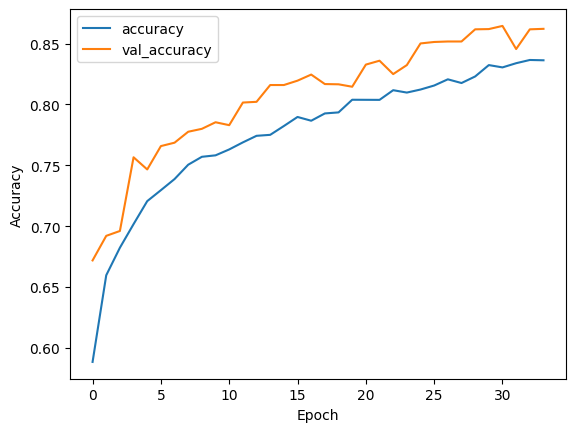

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

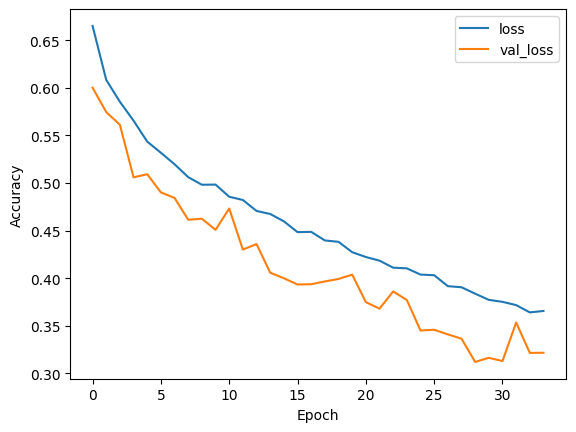

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()